In [1]:
# BACKUP DAS KW - Cria uma variável com as leituras do arquivo, para caso este seja sobrescrito.
fileHandle= open('kw_learn.txt', 'r')
mem = fileHandle.readlines()
fileHandle.close()

## MATERIAL DE APRENDIZADO PARA A RN

In [58]:
import newspaper # Biblioteca que analisa noticias com suporte a Natural Language Processing em Português
import time # Habilita um delay entre os crawls/scraps para que não sufoque os sites acessados, acarretando bloqueio.
from newspaper import Article

In [59]:
kw_list = [] # cria uma lista em branco

fileHandle = open('train_news.txt','r') #Opens the log file of interest
url_news = fileHandle.readlines() #reads the logfile contents into memory as a list
fileHandle.close() # fecha o arquivo para não travar a proxima abertura

In [60]:
def get_kw(url):
    article = Article(url, fetch_images=False, language='pt', request_timeout=200) # Leitura de artigos individualmente, e não baixa as imagens.
    article.download() # baixa
    article.parse() # prepara
    article.nlp() # processa
    print(article.title)
    print(article.publish_date)
    print(article.keywords)
    kw_list.append(article.keywords) # concatena as keywords na lista criada anteriormente
    time.sleep(5) 

In [61]:
print("Getting Keywords from {} articles".format(len(url_news)))
for url in url_news: # para cada url no arquivo lido
    print("URL {}".format(url_news.index(url)))
    url = url.strip() # corta as pontas do link, removendo quebra-linhas e espaços
    try:
        get_kw(url) # chama a função para extrair kw de cada url
        print("done with: ",url)
        print("\n")
    except:
        print("Uh oh! We got an error. NEXT!")
print("done!")

Getting Keywords from 109 articles
URL 0
Homem mata esposa e amante a tiros e comete suicídio em Boa Vista
2019-02-14 00:00:00
['seguida', 'vinicius', 'carro', 'amante', 'polícia', 'efetuados', 'comete', 'luciene', 'vista', 'homem', 'esposa', 'chegou', 'suicídio', 'tiros', 'albério', 'pm', 'mata']
done with:  https://g1.globo.com/rr/roraima/noticia/2019/02/14/homem-mata-esposa-e-amante-a-tiros-e-comete-suicidio-em-boa-vista.ghtml


URL 1
Áudios apontam que jovem estava preso antes de suposta troca de tiros com PMs, em Aragarças
2019-02-15 00:00:00
['preso', 'suposta', 'menino', 'jovem', 'morreu', 'polícia', 'aragarças', 'carro', 'pms', 'troca', 'áudios', 'jeferson', 'tiros', 'apontam', 'família']
done with:  https://g1.globo.com/go/goias/noticia/2019/02/15/audios-apontam-que-jovem-estava-preso-antes-de-suposta-troca-de-tiros-com-pms-em-aragarcas.ghtml


URL 2
Miss ES tem arma apontada para a cabeça ao ter o carro roubado
2019-02-15 00:00:00
['roubadocaso', 'carro', 'cabeça', 'municipal

Criança é atingida por disparo de arma de fogo em Itatim
2019-01-30 00:00:00
['informar', 'vítima', 'rua', 'fogo', 'policiais', 'ferimento', 'arma', 'criança', 'atingida', 'itatim', 'disparo', 'equipe', 'hospital']
done with:  http://midiabahia.com.br/cidades/2019/01/30/crianca-e-atingida-por-disparo-de-arma-de-fogo-em-itatim/


URL 21
Aeronáutica tenta identificar se helicóptero da PM foi atingido por disparo
None
['helicóptero', 'tentam', 'aeronáutica', 'atingido', 'tvaeronáutica', 'visualizações', 'semana', 'tenta', 'sido', 'disparo', 'identificar', 'pm']
done with:  https://videos.band.uol.com.br/16601575/aeronautica-tenta-identificar-se-helicoptero-da-pm-foi-atingido-por-disparo.html


URL 22
Criança é baleada em CG e polícia investiga se disparo foi acidental
None
['menino', 'polícia', 'cg', 'trauma', 'whatsapp', 'criança', 'sábadoredaçãoleia', 'acidental', 'mãe', 'passava', 'atingida', 'campina', 'investiga', 'disparo', 'juristas', 'baleada']
done with:  https://www2.pbagora.com

done with:  https://g1.globo.com/pa/para/noticia/2019/01/02/menino-de-10-anos-morre-apos-suposto-disparo-acidental-de-arma-caseira-em-paragominas.ghtml


URL 43
Após atingir amigo com disparo acidental, PM comete suicídio na Vila Itatiaia, em Goiânia
2018-10-24 22:04:07-03:00
['goiânia', 'arma', 'disparo', 'suicídio', 'pm', 'itatiaia', 'vila', 'amigo', 'faria', 'soldado', 'militar', 'resistiu', 'flávio', 'polícia', 'atingir', 'comete', 'policial', 'acidental', 'oliveira']
done with:  https://www.emaisgoias.com.br/soldado-da-pm-e-amigo-morrem-apos-disparo-acidental-de-arma-de-fogo-na-vila-itatiaia-em-goiania/


URL 44
Morre jovem que fez disparo em academia de tiros na Asa Sul
None
['participar', 'jovem', 'social', 'vida', 'casos', 'suicídio', 'asa', 'sul', 'saúde', 'morre', 'disparo', 'tiros', 'estabelecimento', 'tiro', 'academia']
done with:  https://www.metropoles.com/distrito-federal/morre-jovem-que-fez-disparo-em-academia-de-tiros-na-asa-sul


URL 45
Diretor da Acadepol fez disparo

done with:  https://g1.globo.com/pa/santarem-regiao/noticia/2018/11/30/dupla-armada-faz-disparo-em-supermercado-e-leva-mais-de-r-2-mil-no-bairro-prainha.ghtml


URL 63
Dupla armada faz disparo em supermercado e leva mais de R$ 2 mil no bairro Prainha
2018-11-30 00:00:00
['supermercado', 'prainha', 'prainhaação', 'r', 'bairro', 'proprietários', 'minutos', '2', 'feito', 'quintafeira', 'dupla', 'armada', 'filho', 'disparo', 'leva']
done with:  https://g1.globo.com/pa/santarem-regiao/noticia/2018/11/30/dupla-armada-faz-disparo-em-supermercado-e-leva-mais-de-r-2-mil-no-bairro-prainha.ghtml


URL 65
Em nota, Colégio Adventista promete auxílio psicológico após disparo de arma de fogo
2018-10-17 20:31:17-03:00
['psicológico', 'pais', 'polícia', 'promete', 'fogo', 'nota', 'colégio', 'arma', 'ocorrido', 'sala', 'aluno', 'auxílio', 'adventista', 'disparo', 'lancheira', 'segurança', 'alunos']
done with:  https://www.midiamax.com.br/policia_/2018/em-nota-colegio-adventista-promete-auxilio-psicologi

done with:  https://g1.globo.com/am/amazonas/noticia/2019/02/16/flanelinha-e-morto-a-tiros-nas-proximidades-do-teatro-amazonas.ghtml


URL 84
Homem é encontrado morto a tiros em São Leopoldo
2019-02-16 14:39:35+00:00
['vítima', 'vale', 'polícia', 'morto', 'leopoldo', 'homem', 'encontrado', 'sinos', 'identificada', 'tiros']
done with:  https://gauchazh.clicrbs.com.br/seguranca/noticia/2019/02/homem-e-encontrado-morto-a-tiros-em-sao-leopoldo-cjs7l43ky04de01liopmf6n3c.html


URL 85
Homem é morto a tiros na Marambaia, em Belém
2019-02-14 00:00:00
['lava', 'jatodeterminação', '11', 'condenou', 'marambaia', 'prisão', 'lula', 'morto', 'homem', 'sentença', 'belém', 'tiros', '12']
done with:  https://g1.globo.com/pa/para/noticia/2019/02/14/homem-e-morto-a-tiros-na-marambaia-em-belem.ghtml


URL 86
Homem é morto a tiros em Herveiras
2019-02-17 00:00:00
['vítima', 'calibre', '38', 'militar', 'brigada', 'volta', 'herveiras', 'morto', 'homem', 'alcides', 'tiros', 'suspeitos']
done with:  http://www

done with:  https://g1.globo.com/to/tocantins/noticia/2019/02/18/mulher-ouve-barulho-de-tiro-e-encontra-irmao-morto-em-fazenda-de-palmas.ghtml


URL 106
Adolescente é morto a tiro em distribuidora do Recanto das Emas
2019-02-09 00:00:00
['aconteceu', 'vítima', 'polícia', 'distribuidora', 'região', 'informações', 'volta', 'emas', 'morto', 'recanto', 'quadra', 'adolescente', 'hospital', 'tiro']
done with:  https://www.correiobraziliense.com.br/app/noticia/cidades/2019/02/09/interna_cidadesdf,736510/adolescente-e-morto-a-tiro-em-distribuidora-do-recanto-das-emas.shtml


URL 107
Adolescente é morta com tiro no rosto um mês após comemorar 15 anos
2019-02-08 00:00:00
['pai', 'jovem', 'vítima', 'namorado', 'morta', 'souza', 'rosto', 'disse', 'casa', 'zona', 'camylli', 'comemorar', 'adolescente', '15', 'norte', 'tiro']
done with:  https://noticias.uol.com.br/cotidiano/ultimas-noticias/2019/02/08/adolescente-e-morta-com-tiro-no-rosto-um-mes-apos-comemorar-15-anos.htm


URL 108
Menina de 5 anos 

In [64]:
# kw_list resulta em uma lista de listas. abaixo os elementos são listados em uma única lista.
# exemplo: [[1,2,3],[4,5,6],[7,8,9]] --> [1,2,3,4,5,6,7,8,9]

def kw_clear():
    kw_learn=[] # lista utilizável para aprendizado, já limpa e organizável
    for kw in kw_list: # para cada lista de kw, na lista de listas de kws.
        for sub_kw in kw: # para cada kw dentro da lista de kws.
            kw_learn.append(sub_kw)
            #print(kw_learn)
    return sorted(kw_learn,key=kw_learn.count,reverse=True) # ordena as kw por ordem de frequência de aparecimento nas noticias
kw_learn = kw_clear();

In [65]:
## Salva as KW para análise posterior
with open('kw_learn.txt', 'w') as f:
    for item in kw_learn:
        f.write("%s\n" % item)
    f.close()

Análise das Keywords

In [66]:
## Abre as KW
fileHandle = open('kw_learn.txt', 'r')
kw_learn = fileHandle.readlines()
fileHandle.close()

In [67]:
len(kw_learn)

1597

In [68]:
kw_learn = kw_clear();

In [69]:
import collections
a = kw_learn
counter=collections.Counter(a)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(50))

[('disparo', 56), ('polícia', 52), ('arma', 41), ('tiro', 32), ('homem', 30), ('tiros', 29), ('vítima', 29), ('morto', 22), ('fogo', 21), ('jovem', 19), ('pm', 16), ('militar', 16), ('acidental', 16), ('volta', 13), ('rua', 12), ('atingido', 12), ('morre', 11), ('mulher', 11), ('zona', 10), ('atingida', 10), ('preso', 9), ('suspeito', 9), ('policial', 9), ('cabeça', 8), ('policiais', 8), ('criança', 8), ('casa', 8), ('carro', 7), ('revólver', 7), ('hospital', 7), ('pai', 7), ('menino', 6), ('suspeitos', 6), ('segundafeira', 6), ('região', 6), ('veículo', 6), ('tentativa', 6), ('silva', 6), ('sido', 6), ('morreu', 5), ('quintafeira', 5), ('sul', 5), ('bairro', 5), ('moradores', 5), ('sextafeira', 5), ('rapaz', 5), ('espingarda', 5), ('morta', 5), ('sábado', 5), ('residência', 5)]


In [70]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Visualização dos dados

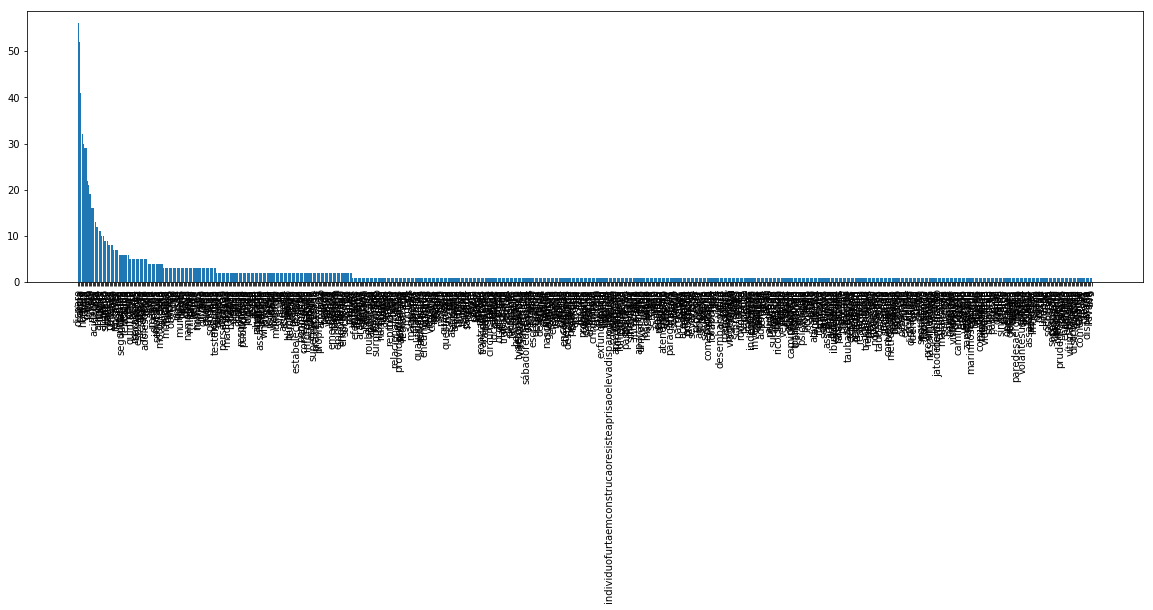

In [71]:
a = counter
plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.bar(range(len(a)), list(a.values()), align='center')
plt.xticks(range(len(a)), list(a.keys()))
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.show()

In [72]:
## Separa o dict gerada pela selecao de 50 palavras mais comuns em duas listas

i=0
words=[]
occurrences=[]
a = counter.most_common(50) # Pega as 50 palavras mais comuns
for i in range(len(a)):
    words.append(a[i][0])
    occurrences.append(a[i][1])
#print(words)
#print(occurrences)

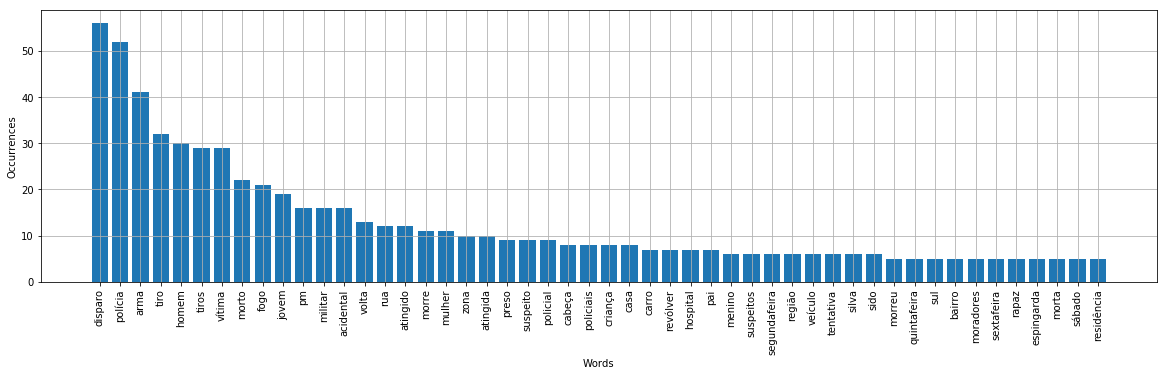

In [73]:
## Analise visual da ocorrencia de palavras

plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.subplot(111) # coordenadas do grafico a ser plotado.
plt.bar(words,occurrences)
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.grid()
plt.show()